# AT3 - Data Understanding

We read in the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv("../data/interim/itineraries_csv/all_airports_combined.csv")

In [3]:
df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,8c3e12759e1b91a21803d1a6178606a8,2022-05-05,2022-06-06,OAK,ATL,PT7H42M,False,False,False,193.99,...,1654577160||1654595760,2022-06-06T22:46:00.000-06:00||2022-06-07T05:5...,DEN||ATL,OAK||DEN,Frontier Airlines||Frontier Airlines,F9||F9,||,9120||10620,943||1207,coach||coach
1,09116e0be6bc1b357c6695e00f48df17,2022-05-05,2022-06-06,OAK,ATL,PT10H25M,False,False,False,255.58,...,1654539000||1654561500,2022-06-06T13:10:00.000-05:00||2022-06-06T20:2...,ORD||ATL,OAK||ORD,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319,15000||7800,None||None,coach||coach
2,27884a7714f975bd4692f0734562a9b1,2022-05-05,2022-06-06,OAK,ATL,PT6H40M,False,False,False,304.78,...,1654547640||1654566000,2022-06-06T13:34:00.000-07:00||2022-06-06T21:4...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,||Airbus A319,5640||14700,None||None,coach||coach
3,46ecaf6738817f2ab949310f9cff6231,2022-05-05,2022-06-06,OAK,ATL,PT8H35M,False,False,False,304.78,...,1654540680||1654566000,2022-06-06T11:38:00.000-07:00||2022-06-06T21:4...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A321 SHARKLETS||Airbus A319,5580||14700,None||None,coach||coach
4,00c9d3aad9478336d57280e4dcfcbd2a,2022-05-05,2022-06-06,OAK,ATL,PT14H5M,False,False,False,304.78,...,1654584360||1654629300,2022-06-06T23:46:00.000-07:00||2022-06-07T15:1...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...,5760||14700,None||None,coach||coach


In [18]:
df.dtypes

legId                                        object
searchDate                                   object
flightDate                           datetime64[ns]
startingAirport                              object
destinationAirport                           object
travelDuration                               object
isBasicEconomy                                 bool
isRefundable                                   bool
isNonStop                                      bool
totalFare                                   float64
totalTravelDistance                         float64
segmentsDepartureTimeEpochSeconds            object
segmentsDepartureTimeRaw                     object
segmentsArrivalTimeEpochSeconds              object
segmentsArrivalTimeRaw                       object
segmentsArrivalAirportCode                   object
segmentsDepartureAirportCode                 object
segmentsAirlineName                          object
segmentsAirlineCode                          object
segmentsEqui

In [17]:
df["flightDate"] = pd.to_datetime(df["flightDate"])

In [19]:
df["flightDate"].min()

Timestamp('2022-04-17 00:00:00')

In [20]:
df["flightDate"].max()

Timestamp('2022-07-17 00:00:00')

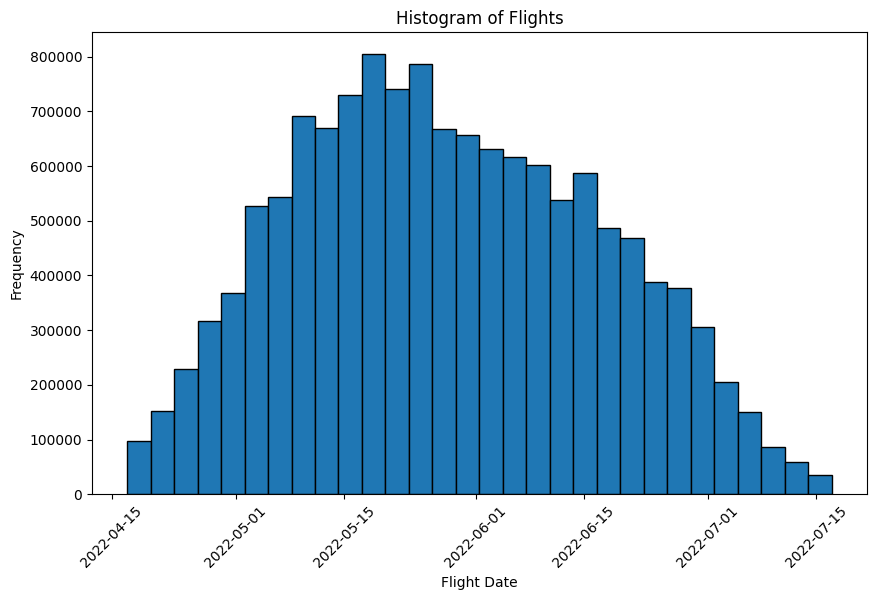

In [38]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df["flightDate"], bins=30, edgecolor='black')
plt.xlabel("Flight Date")
plt.ylabel("Frequency")
plt.title("Histogram of Flights")
plt.xticks(rotation=45)
plt.show()

In [79]:
df.iloc[0:5,16:]

,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,OAK||DEN,Frontier Airlines||Frontier Airlines,F9||F9,||,9120||10620,943||1207,coach||coach
1,OAK||ORD,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319,15000||7800,None||None,coach||coach
2,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,||Airbus A319,5640||14700,None||None,coach||coach
3,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A321 SHARKLETS||Airbus A319,5580||14700,None||None,coach||coach
4,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...,5760||14700,None||None,coach||coach


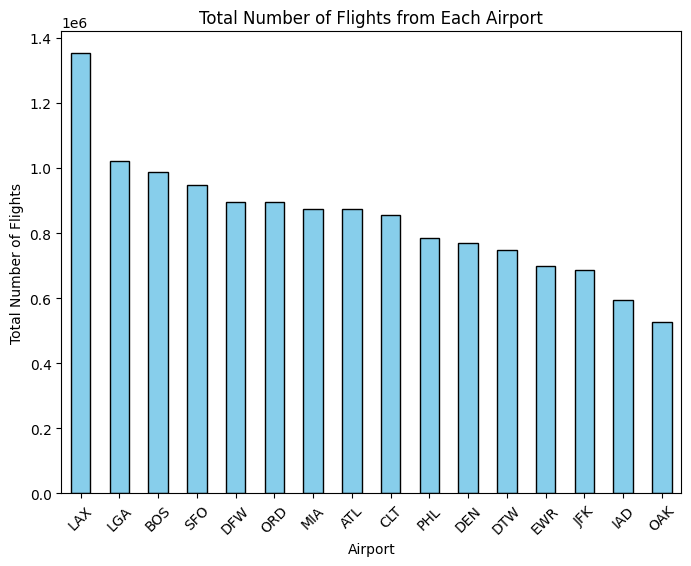

In [60]:
airport_flight_counts = df["startingAirport"].value_counts()

# Plotting the total number of flights from each airport as a bar chart
plt.figure(figsize=(8, 6))
airport_flight_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Airport")
plt.ylabel("Total Number of Flights")
plt.title("Total Number of Flights from Each Airport")
plt.xticks(rotation=45)
plt.show()

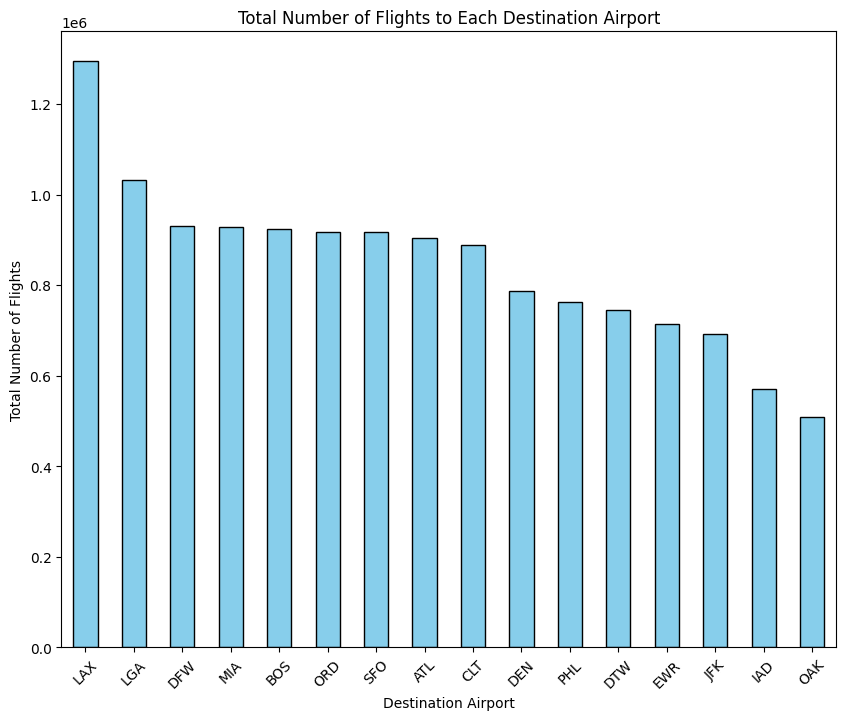

In [61]:
destination_flight_counts = df["destinationAirport"].value_counts()

# Plotting the total number of flights to each destination airport as a bar chart
plt.figure(figsize=(10, 8))
destination_flight_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Destination Airport")
plt.ylabel("Total Number of Flights")
plt.title("Total Number of Flights to Each Destination Airport")
plt.xticks(rotation=45)
plt.show()

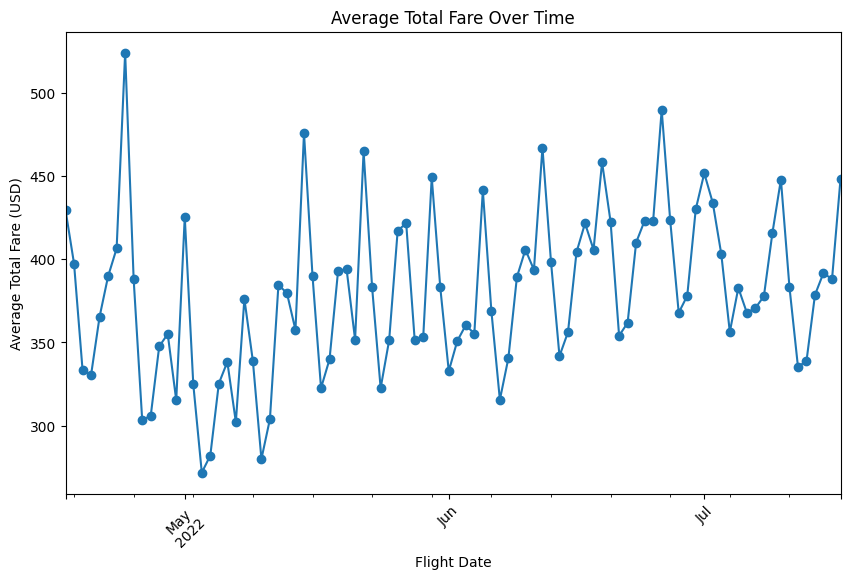

In [62]:
average_fare_over_dates = df.groupby("flightDate")["totalFare"].mean()

# Plotting the line plot of average fare over dates
plt.figure(figsize=(10, 6))
average_fare_over_dates.plot(kind="line", marker='o', linestyle='-')
plt.xlabel("Flight Date")
plt.ylabel("Average Total Fare (USD)")
plt.title("Average Total Fare Over Time")
plt.xticks(rotation=45)
plt.show()

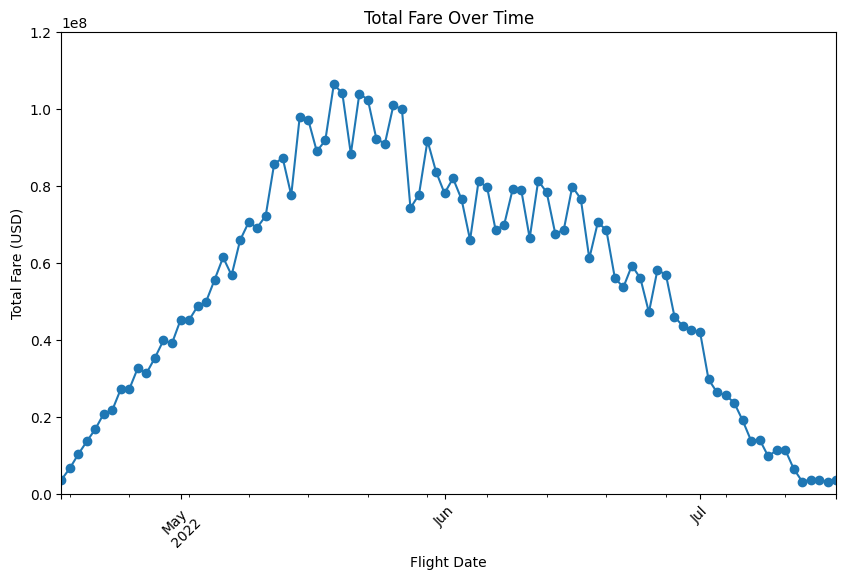

In [77]:
# Calculate the total fare over dates instead of the average
total_fare_over_dates = df.groupby("flightDate")["totalFare"].sum()

# Plotting the line plot of total fare over dates
plt.figure(figsize=(10, 6))
total_fare_over_dates.plot(kind="line", marker='o', linestyle='-')
plt.xlabel("Flight Date")
plt.ylabel("Total Fare (USD)")
plt.title("Total Fare Over Time")
plt.xticks(rotation=45)
plt.ylim(-100,120000000)
plt.show()

<Figure size 800x600 with 0 Axes>

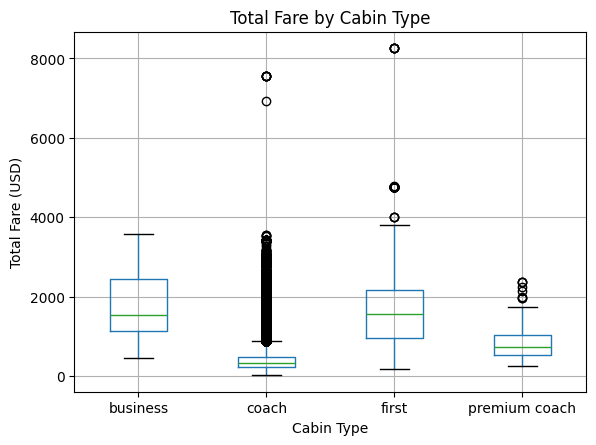

In [12]:
# Extracting the first cabin type
df["cabinType"] = df["segmentsCabinCode"].str.split(r'\|\|').str[0]

# Plotting the boxplot of total fare over cabin types
plt.figure(figsize=(8, 6))
df.boxplot(column="totalFare", by="cabinType")
plt.xlabel("Cabin Type")
plt.ylabel("Total Fare (USD)")
plt.title("Total Fare by Cabin Type")
plt.suptitle("")  # Removes the automatic 'Boxplot grouped by cabinType' title
plt.show()

/var/folders/mh/j3zy8xqx2v32dk0tv4nx5x8m0000gn/T/ipykernel_1771/12579188.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='startingAirport', y='totalFare', data=df, palette="Set3")


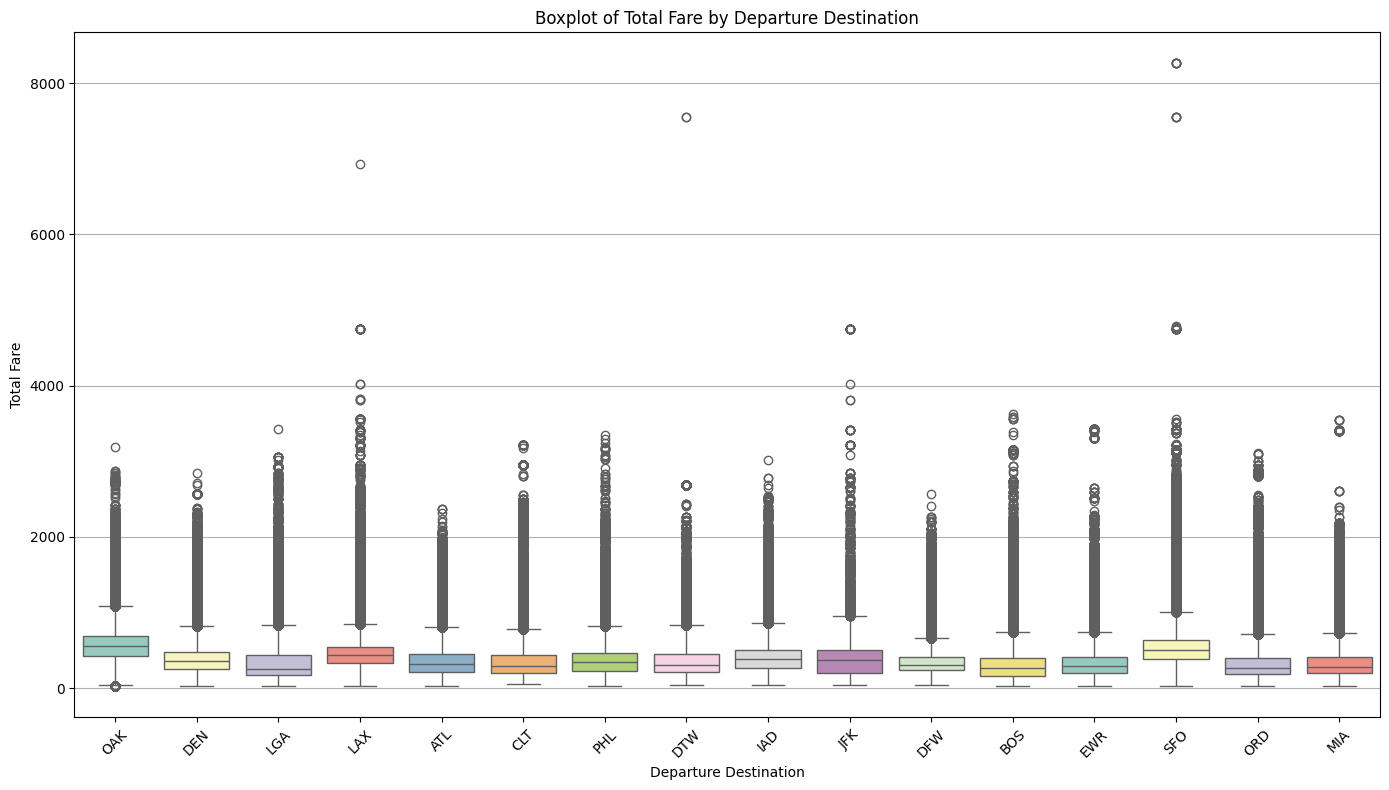

In [3]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='startingAirport', y='totalFare', data=df, palette="Set3")
plt.title('Boxplot of Total Fare by Departure Destination')
plt.xlabel('Departure Destination')
plt.ylabel('Total Fare')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/var/folders/mh/j3zy8xqx2v32dk0tv4nx5x8m0000gn/T/ipykernel_1771/4018981159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='destinationAirport', y='totalFare', data=df, palette="Set3")


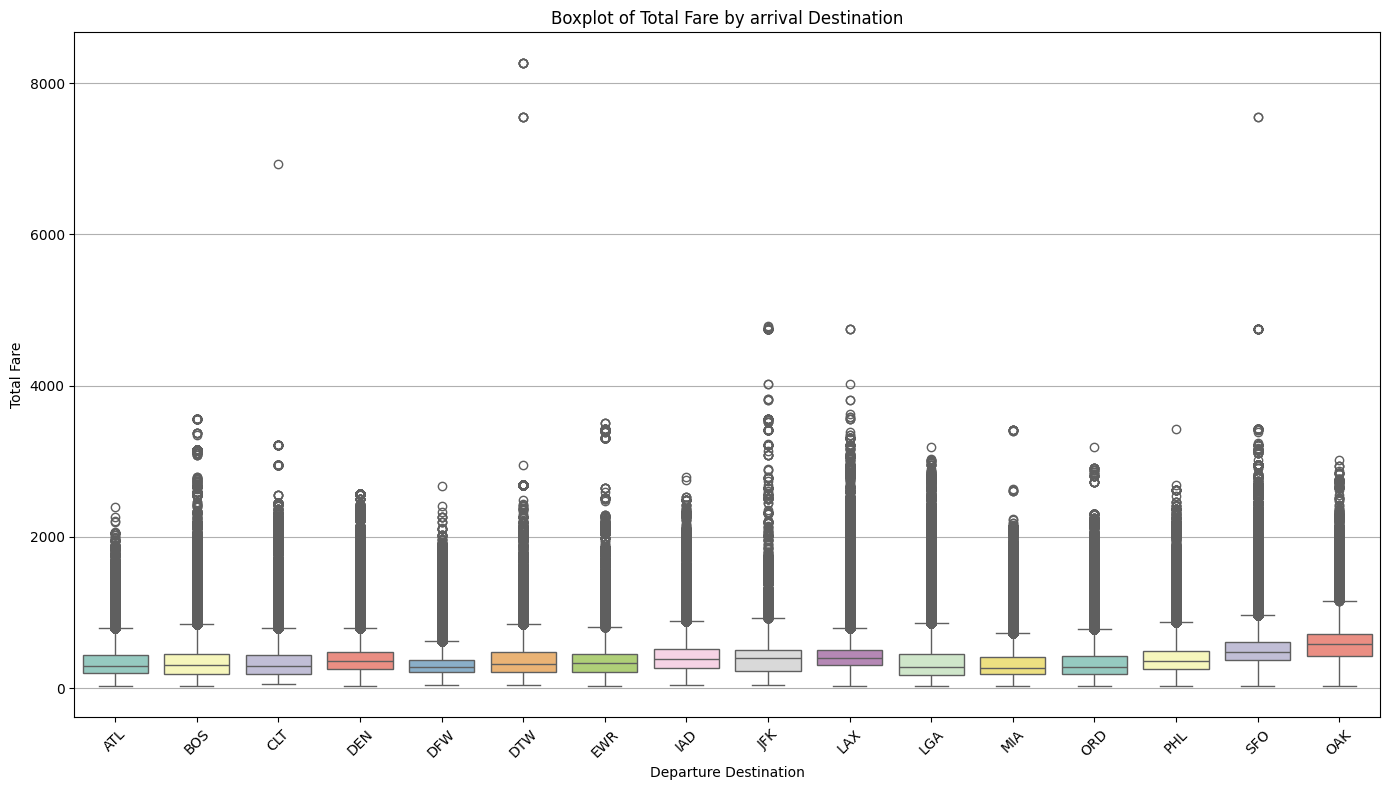

In [4]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='destinationAirport', y='totalFare', data=df, palette="Set3")
plt.title('Boxplot of Total Fare by arrival Destination')
plt.xlabel('Departure Destination')
plt.ylabel('Total Fare')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

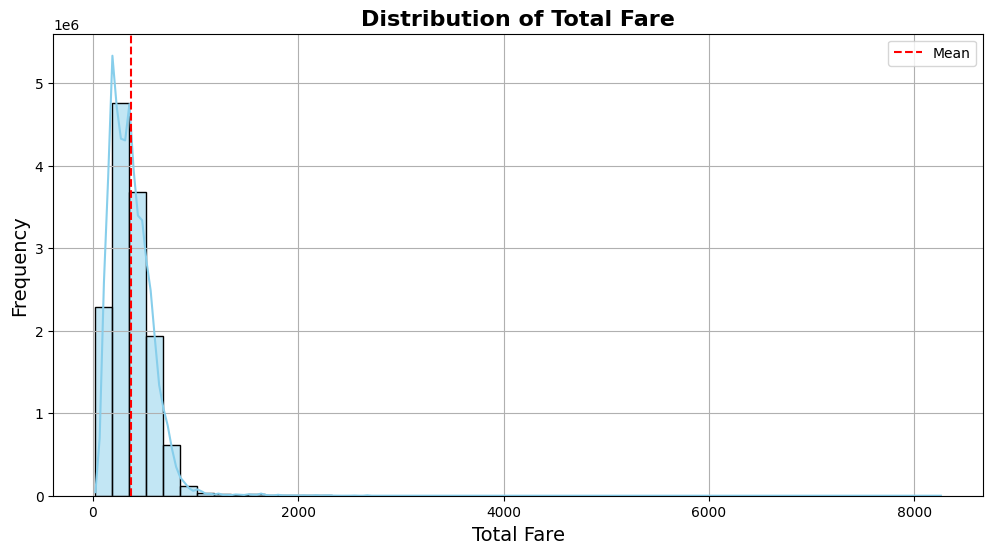

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(df['totalFare'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Total Fare', fontsize=16, fontweight='bold')
plt.xlabel('Total Fare', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.axvline(df['totalFare'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

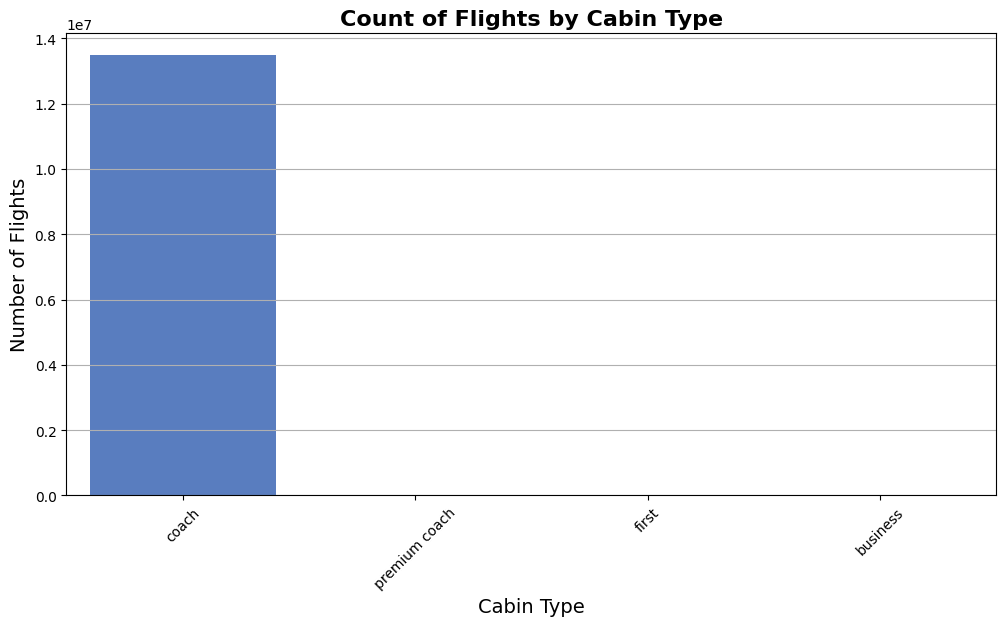

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cabinType', order=df['cabinType'].value_counts().index, hue='cabinType', palette='muted', legend=False)
plt.title('Count of Flights by Cabin Type', fontsize=16, fontweight='bold')
plt.xlabel('Cabin Type', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()